## Importing necessary libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import boxcox

## Data gathering

In [6]:
data = pd.read_excel('stock_market_dataset.xlsx')

In [7]:
data.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Apr 28, 2023",33797.43,34104.56,33728.40,34098.16,34098.16,354310000
1,"Apr 27, 2023",33381.66,33859.75,33374.65,33826.16,33826.16,343240000
2,"Apr 26, 2023",33596.34,33645.83,33235.85,33301.87,33301.87,321170000
3,"Apr 25, 2023",33828.34,33875.49,33525.39,33530.83,33530.83,297880000
4,"Apr 24, 2023",33805.04,33891.15,33726.09,33875.40,33875.40,252020000


In [8]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume'], dtype='object')

## Data preprocessing

In [9]:
# changing column name format for uniformity
data.columns = data.columns.str.lower().str.replace('*','').str.replace(' ','_')

In [10]:
data.columns

Index(['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume'], dtype='object')

In [11]:
# changing datatype of 'date' column for further calculation
data['date'] = pd.to_datetime(data['date'])

In [12]:
# getting 'weekday name', 'month name' and 'year' from 'date' columns
data['wkday'] = data['date'].dt.day_name()
data['month'] = data['date'].dt.month_name()
data['year'] = data['date'].dt.year

In [13]:
data.head()

,date,open,high,low,close,adj_close,volume,wkday,month,year
0,2023-04-28,33797.43,34104.56,33728.40,34098.16,34098.16,354310000,Friday,April,2023
1,2023-04-27,33381.66,33859.75,33374.65,33826.16,33826.16,343240000,Thursday,April,2023
2,2023-04-26,33596.34,33645.83,33235.85,33301.87,33301.87,321170000,Wednesday,April,2023
3,2023-04-25,33828.34,33875.49,33525.39,33530.83,33530.83,297880000,Tuesday,April,2023
4,2023-04-24,33805.04,33891.15,33726.09,33875.40,33875.40,252020000,Monday,April,2023


In [14]:
data.drop(['date'], axis=1, inplace=True)
data.head()

,open,high,low,close,adj_close,volume,wkday,month,year
0,33797.43,34104.56,33728.40,34098.16,34098.16,354310000,Friday,April,2023
1,33381.66,33859.75,33374.65,33826.16,33826.16,343240000,Thursday,April,2023
2,33596.34,33645.83,33235.85,33301.87,33301.87,321170000,Wednesday,April,2023
3,33828.34,33875.49,33525.39,33530.83,33530.83,297880000,Tuesday,April,2023
4,33805.04,33891.15,33726.09,33875.40,33875.40,252020000,Monday,April,2023


In [15]:
data.dtypes

open         float64
high         float64
low          float64
close        float64
adj_close    float64
volume         int64
wkday         object
month         object
year           int32
dtype: object

In [16]:
data.shape

(1258, 9)

## Statistical analysis

In [18]:
# finding correlation between all the features and target variables
data_corr = data.select_dtypes(include = np.number).corr()
data_corr 

,open,high,low,close,adj_close,volume,year
open,1.000000,0.999043,0.998626,0.997592,0.997592,-0.088002,0.802391
high,0.999043,1.000000,0.998198,0.998682,0.998682,-0.073388,0.810497
low,0.998626,0.998198,1.000000,0.998839,0.998839,-0.115077,0.793203
close,0.997592,0.998682,0.998839,1.000000,1.000000,-0.096766,0.802385
adj_close,0.997592,0.998682,0.998839,1.000000,1.000000,-0.096766,0.802385
volume,-0.088002,-0.073388,-0.115077,-0.096766,-0.096766,1.000000,0.148537
year,0.802391,0.810497,0.793203,0.802385,0.802385,0.148537,1.000000


In [19]:
# fetching relevant data for analysis based on correlation values
corr_threshold = 0.7
new_cols = []
close_corr = data_corr['close']
close_corr.drop(['close'],inplace = True)
for i in close_corr.index:
    if close_corr[i] > corr_threshold:
        new_cols.append(i)
new_cols

['open', 'high', 'low', 'adj_close', 'year']

In [25]:
# removing 'adj_close' column as it has correlation close to one
new_cols.remove('adj_close')
new_cols

['open', 'high', 'low', 'year']

In [26]:
data_stat = data[new_cols].describe()
data_stat

,open,high,low,year
count,1258.000000,1258.000000,1258.000000,1258.000000
mean,29595.823045,29776.945739,29402.432226,2020.323529
std,4006.078299,4009.007573,4004.949066,1.487504
min,19028.360000,19121.010000,18213.650000,2018.000000
25%,26041.267500,26163.155000,25877.872500,2019.000000
50%,29201.410000,29335.685000,28996.500000,2020.000000
75%,33604.027500,33825.445000,33346.827500,2022.000000
max,36722.600000,36952.650000,36636.000000,2023.000000


## Features and target variables selection

In [27]:
# setting target variable
y_col ='close'

# getting numerical columns
x_num = new_cols

In [28]:
# getting categorical columns
x_cat = data.select_dtypes(exclude=np.number).columns
x_cat

Index(['wkday', 'month'], dtype='object')

In [29]:
X_num = data[x_num]
X_cat = data[x_cat]
y = data[y_col]

In [30]:
X_num.head()

,open,high,low,year
0,33797.43,34104.56,33728.40,2023
1,33381.66,33859.75,33374.65,2023
2,33596.34,33645.83,33235.85,2023
3,33828.34,33875.49,33525.39,2023
4,33805.04,33891.15,33726.09,2023


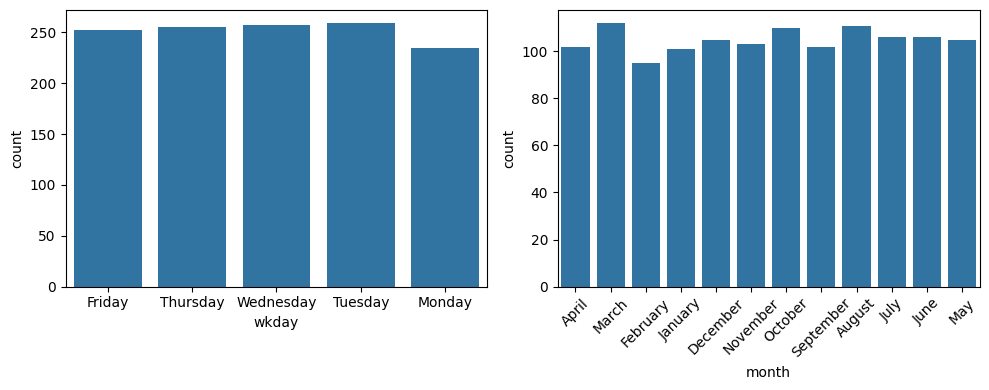

In [36]:
# visualizing categorical features
fig, ax = plt.subplots(1,2, figsize = (10,4))

sns.countplot(x = 'wkday', data = data, ax = ax[0])
sns.countplot(x = 'month', data = data, ax = ax[1])
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()


In [37]:
# one hot encoding for categorical variables
data_encode = pd.get_dummies(X_cat, drop_first = True).astype(int)
data_encode.head()

,wkday_Monday,wkday_Thursday,wkday_Tuesday,wkday_Wednesday,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
data_encode.shape

(1258, 15)

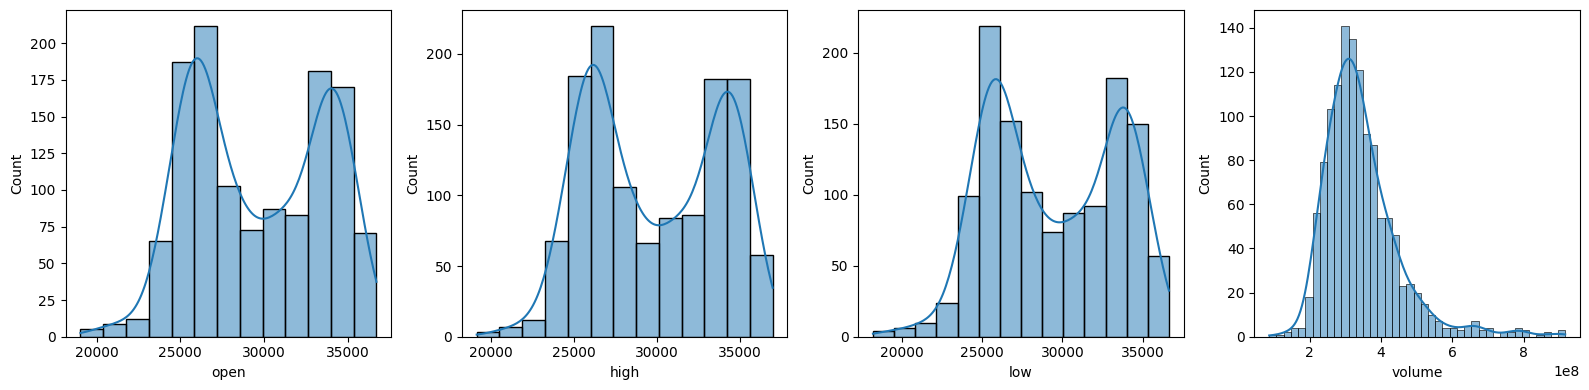

In [39]:
# visualizing numerical features
fig, ax = plt.subplots(1,4, figsize = (16,4))
sns.histplot(x = 'open', data = data, ax = ax[0], kde = True)
sns.histplot(x = 'high', data = data, ax = ax[1], kde = True)
sns.histplot(x = 'low', data = data, ax = ax[2], kde = True)
sns.histplot(x = 'volume', data = data, ax = ax[3], kde = True)
# sns.histplot(x = 'adj_close', data = data, ax = ax[4], kde = True)

plt.tight_layout()

## Data transformation

In [41]:
# standard deviation of all the features is very high
# to deal with this, we transform the data
X_log = np.log(X_num)
X_log.head()

,open,high,low,year
0,10.428140,10.437186,10.426095,7.612337
1,10.415762,10.429982,10.415552,7.612337
2,10.422172,10.423644,10.411384,7.612337
3,10.429054,10.430447,10.420058,7.612337
4,10.428365,10.430909,10.426027,7.612337


In [42]:
X_log.describe()

,open,high,low,year
count,1258.000000,1258.000000,1258.000000,1258.000000
mean,10.286096,10.292316,10.279395,7.611013
std,0.136967,0.135989,0.138158,0.000736
min,9.853686,9.858543,9.809927,7.609862
25%,10.167438,10.172107,10.161144,7.610358
50%,10.281972,10.286560,10.274930,7.610853
75%,10.422401,10.428969,10.414718,7.611842
max,10.511148,10.517393,10.508787,7.612337


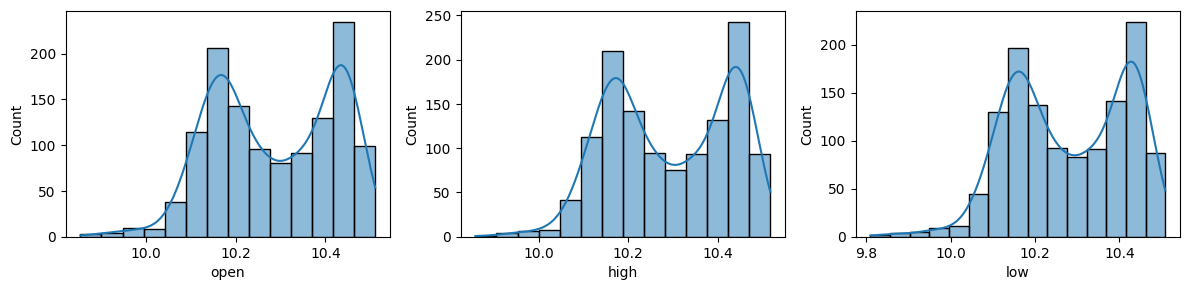

In [45]:
fig, ax = plt.subplots(1,3, figsize = (12,3))
sns.histplot(x = 'open', data = X_log, ax = ax[0], kde = True)
sns.histplot(x = 'high', data = X_log, ax = ax[1], kde = True)
sns.histplot(x = 'low', data = X_log, ax = ax[2], kde = True)

plt.tight_layout()

In [47]:
# creating a dataset without ay transformation for one of the further analysis
X_new = pd.concat([X_num, data_encode], axis = 1)
X_new.head()

,open,high,low,year,wkday_Monday,wkday_Thursday,wkday_Tuesday,wkday_Wednesday,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,33797.43,34104.56,33728.40,2023,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,33381.66,33859.75,33374.65,2023,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,33596.34,33645.83,33235.85,2023,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,33828.34,33875.49,33525.39,2023,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,33805.04,33891.15,33726.09,2023,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
# creating a feature datase with log transformation
X_new_log = pd.concat([X_log, data_encode], axis = 1)
X_new_log.head()

,open,high,low,year,wkday_Monday,wkday_Thursday,wkday_Tuesday,wkday_Wednesday,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,10.428140,10.437186,10.426095,7.612337,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,10.415762,10.429982,10.415552,7.612337,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10.422172,10.423644,10.411384,7.612337,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,10.429054,10.430447,10.420058,7.612337,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,10.428365,10.430909,10.426027,7.612337,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
y.describe()

count     1258.000000
mean     29599.361677
std       4007.468822
min      18591.930000
25%      26027.120000
50%      29199.460000
75%      33600.342500
max      36799.650000
Name: close, dtype: float64

In [50]:
# boxcox transformation for target variable to make it closer to normal distribution
y_bc, y_lam = boxcox(y)
print(y_lam)
y_bc

0.6678215798232667


array([1592.16046308, 1583.65945251, 1567.20907442, ..., 1256.54071225,
       1256.35919623, 1262.46356127], shape=(1258,))

## Linear Regression model

The main objective of this project is to compare the coefficients and errors using different transformation and regularization methods. So, for this analysis, I will use the dataset: X_new_log and y_bc, which is log transformation of features (X_new_log) and bixcox_transformation of target variable (y_bc).

Case 1: Use standard scaler.

Case 2: Use standard scaler with Polynomial features of degree 2.

Case 3: Use standard scaler, polynomial feature with Lasso regularization (using cross validation method to find the best value of alpha)

Case 4: Use standard scaler, polymonial feature with Ridge regularization (using cross validation method to find the best value of alpha)



In [51]:
# creating instances of linear regression model, and scaling and polynomial features
lr = LinearRegression()
std = StandardScaler()
poly = PolynomialFeatures(degree = 2, include_bias = False)

In [52]:
# creating instances for Lasso and Ridge Regression
lasso = Lasso()
ridge = Ridge()

In [53]:
# splitting dataset into training and testing sets with test-size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X_new_log, y_bc, test_size = 0.2, random_state = 42)

In [54]:
# case 1: using standard scaler
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

lr.fit(X_train, y_train)
y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print('Train MSE: ', mse_train)
print('Test MSE: ', mse_test )

print('Train R2: ', r2_train)
print('Test R2: ', r2_test)

index_val = ['Train MSE', 'Test MSE', 'Train R2', 'Test R2']

error_df = pd.DataFrame({'standard_scaler': [mse_train, mse_test, r2_train, r2_test]}, index = index_val)
error_df.head()

Train MSE:  42.70518175875085
Test MSE:  37.604463043226914
Train R2:  0.9975146179756945
Test R2:  0.9978407160078392


,standard_scaler
Train MSE,42.705182
Test MSE,37.604463
Train R2,0.997515
Test R2,0.997841


In [55]:
# fetching coefficients of linear regression model
coef_lr = lr.coef_

# creating a dataframe , 'coef_df', of coefficients
coef_df = pd.DataFrame(coef_lr, index = X_new_log.columns, columns = ['coef'])
coef_df.sort_values(by = 'coef', ascending = False).head()

,coef
high,1111.653756
low,504.765089
wkday_Monday,-0.144883
wkday_Thursday,-0.287790
month_May,-0.400012


In [56]:
# case 2: using standard scaler and polynomial feature
X_train_poly = poly.fit_transform(X_train_std)
X_test_poly = poly.transform(X_test_std)

X_train_std = std.fit_transform(X_train_poly)
X_test_std = std.transform(X_test_poly)

lr.fit(X_train_std, y_train)
y_pred_test = lr.predict(X_test_std)
y_pred_train = lr.predict(X_train_std)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print('Train MSE: ', mse_train)
print('Test MSE: ', mse_test )

print('Train R2: ', r2_train)
print('Test R2: ', r2_test)

error_df['scaling_and_polynomial'] =  [mse_train, mse_test, r2_train, r2_test]

error_df

Train MSE:  14.827167409956184
Test MSE:  18.324069924388823
Train R2:  0.999137079533808
Test R2:  0.9989478144970855


,standard_scaler,scaling_and_polynomial
Train MSE,42.705182,14.827167
Test MSE,37.604463,18.324070
Train R2,0.997515,0.999137
Test R2,0.997841,0.998948


In [57]:
# get column names after applying polynomial features
poly_cols = poly.get_feature_names_out(X_new_log.columns)
coef_poly = lr.coef_

# creating a dataframe for coefficients
coef_comparison = pd.DataFrame({'coef_poly': coef_poly}, index = poly_cols)
coef_comparison.sort_values(by = 'coef_poly', ascending = False).head()

,coef_poly
high^2,185.986165
open^2,175.849065
low,106.424674
high,95.038611
open low,68.793957


In [58]:
# case 3: standard scaler, polynomial feature with Lasso
lasso = Lasso()

# Define parameter grid for cross validation
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

# Grid Search
grid = GridSearchCV(lasso, param_grid, scoring='neg_mean_squared_error', cv=5)
grid.fit(X_train, y_train)

# finding best alpha value for Lasso
best_alpha = grid.best_params_['alpha']
print("Best alpha for Lasso:", best_alpha)

Best alpha for Lasso: 0.0001


In [59]:
# using best alpha value to predict target variable
lasso = Lasso(alpha = best_alpha)
lasso.fit(X_train_std, y_train)

y_pred_test = lasso.predict(X_test_std)
y_pred_train = lasso.predict(X_train_std)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print('Train MSE: ', mse_train)
print('Test MSE: ', mse_test )

print('Train R2: ', r2_train)
print('Test R2: ', r2_test)

error_df['lasso'] =  [mse_train, mse_test, r2_train, r2_test]

Train MSE:  19.428781792744616
Test MSE:  24.31675818330427
Train R2:  0.9988692719938618
Test R2:  0.9986037086442081


In [62]:
# fetching coefficients for lasso regression
coef_lasso = lasso.coef_

# adding lasso coefficients to coef_comparison dataframe
coef_comparison['coef_lasso'] = coef_lasso

In [63]:
# case 4: standard sclaer, polynomial feature with Ridge
ridge = Ridge()

# Define parameter grid
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

# Grid Search
grid = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=5)
grid.fit(X_train, y_train)

# finding best alpha value for Ridge
best_alpha = grid.best_params_['alpha']
print("Best alpha for Ridge:", best_alpha)

Best alpha for Ridge: 0.0001


In [65]:
# using best alpha value to predict target variable
ridge = Ridge(alpha = best_alpha)
ridge.fit(X_train_std, y_train)

y_pred_test = ridge.predict(X_test_std)
y_pred_train = ridge.predict(X_train_std)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print('Train MSE: ', mse_train)
print('Test MSE: ', mse_test )

print('Train R2: ', r2_train)
print('Test R2: ', r2_test)

error_df['ridge'] =  [mse_train, mse_test, r2_train, r2_test]

Train MSE:  14.828690348446154
Test MSE:  18.308215659744818
Train R2:  0.9991369909009117
Test R2:  0.9989487248640229


In [66]:
# fetching coefficients for Ridge regression
coef_ridge = ridge.coef_

# adding ridge coefficient to coef_comparison dataframe
coef_comparison['coef_ridge'] = coef_ridge

## Analysis comparison

In [70]:
# comparison of coefficients of different models with their absolute values
coef_comparison.sort_values(by = 'coef_poly', ascending = False).abs().head()

,coef_poly,coef_lasso,coef_ridge
high^2,185.986165,0.658667,174.484615
open^2,175.849065,16.685322,160.049590
low,106.424674,65.343380,106.236219
high,95.038611,89.681809,95.588900
open low,68.793957,6.406676,72.762212


In [75]:
# comparison of error dataframe
error_df

,standard_scaler,scaling_and_polynomial,lasso,ridge
Train MSE,42.705182,14.827167,19.428782,14.828690
Test MSE,37.604463,18.324070,24.316758,18.308216
Train R2,0.997515,0.999137,0.998869,0.999137
Test R2,0.997841,0.998948,0.998604,0.998949


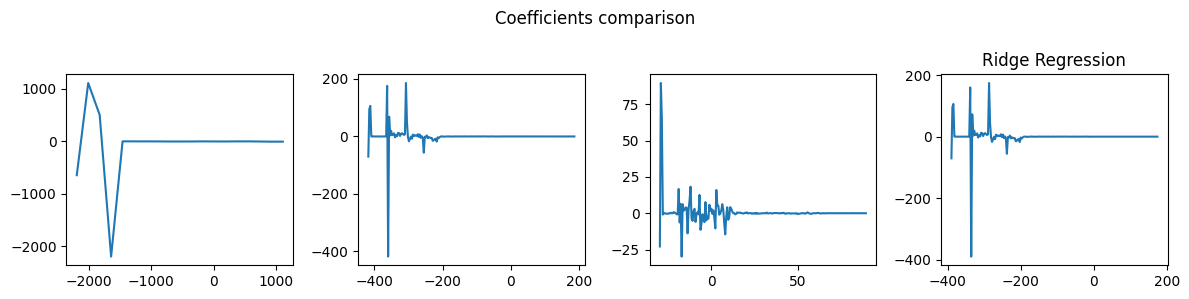

In [72]:
fig, ax = plt.subplots(1,4, figsize = (12,3))

x_val_lr = np.linspace(coef_lr.min(), coef_lr.max(), len(coef_lr))
ax[0].plot(x_val_lr, coef_lr)
plt.title('Linear Regression')

x_val_poly = np.linspace(coef_poly.min(), coef_poly.max(), len(coef_poly))
ax[1].plot(x_val_poly, coef_poly)
plt.title('Polynoimal features')

x_val_lasso = np.linspace(coef_lasso.min(), coef_lasso.max(), len(coef_lasso))
ax[2].plot(x_val_lasso, coef_lasso)
plt.title('Lasso Regression')

x_val_ridge = np.linspace(coef_ridge.min(), coef_ridge.max(), len(coef_ridge))
ax[3].plot(x_val_ridge, coef_ridge)
plt.title('Ridge Regression')

fig.suptitle('Coefficients comparison')
plt.tight_layout()

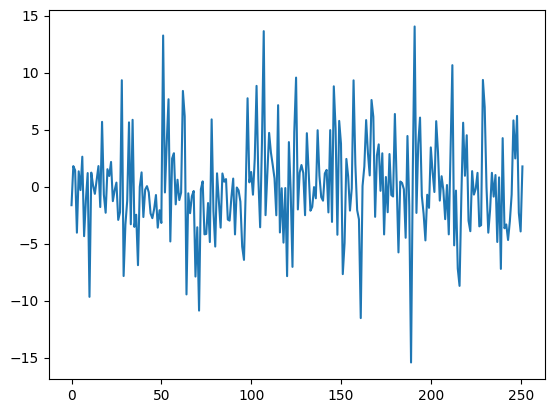

In [73]:
# residual plot
residual = y_test - y_pred_test
plt.plot(residual)